In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Importa las bibliotecas necesarias para manipulación de datos y visualización de graficos.


In [5]:
df_sales = pd.read_csv("nyc-rolling-sales.csv")
# Carga el conjunto de datos de ventas desde un archivo CSV.

In [6]:
df_sales.head()
# Muestra las primeras cinco filas del DataFrame 'df_sales'.

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
df_sales.info()
# Muestra un resumen informativo del DataFrame 'df_sales'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
df_sales['NEIGHBORHOOD'].value_counts().count()
# Cuenta el número de valores únicos en la columna 'NEIGHBORHOOD'.


np.int64(254)

In [9]:
df_sales['BOROUGH'].value_counts().count()
# Cuenta el número de valores únicos en la columna 'BOROUGH'.


np.int64(5)

In [10]:
df_sales['BOROUGH'] = df_sales['BOROUGH'].astype(str)
# Convierte la columna 'BOROUGH' a tipo string.
df_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
# Reemplaza los valores numéricos de 'BOROUGH' con sus nombres correspondientes.
df_sales['SALE PRICE'] = df_sales['SALE PRICE'].replace({' -  ':'0'})
# Reemplaza los valores ' -  ' en 'SALE PRICE' con 0.
df_sales['SALE PRICE'] = df_sales['SALE PRICE'].astype(float)
# Convierte la columna 'SALE PRICE' a tipo float.
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])
# Convierte la columna 'SALE DATE' a tipo datetime.
df_sales['sale_month']= df_sales['SALE DATE'].dt.month_name()
# Extrae el nombre del mes de 'SALE DATE' y lo almacena en una nueva columna 'sale_month'.
df_sales['sale_year']= df_sales['SALE DATE'].dt.year
# Extrae el año de 'SALE DATE' y lo almacena en una nueva columna 'sale_year'

C:\Users\isabe\AppData\Local\Temp\ipykernel_24828\2199075491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)


In [11]:
df_sales.info()
# Muestra un resumen informativo del DataFrame 'df_sales'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  object        
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            84548 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       84548 non-null  object        
 8   BUILDING CLASS AT PRESENT       84548 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                84548 non-null  object        
 11  ZI

In [12]:
df_sales.head()
# Muestra las primeras cinco filas del DataFrame 'df_sales'.

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,1633,6440,1900,2,C2,6625000.0,2017-07-19,July,2017
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,31,4616,18690,1900,2,C7,0.0,2016-12-14,December,2016
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,17,2212,7803,1900,2,C7,0.0,2016-12-09,December,2016
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,2272,6794,1913,2,C4,3936272.0,2016-09-23,September,2016
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,2369,4615,1900,2,C2,8000000.0,2016-11-17,November,2016


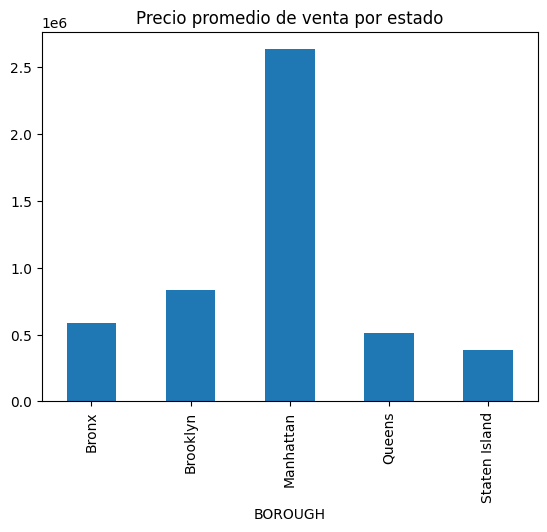

In [13]:
df_sales['SALE PRICE'].groupby(df_sales['BOROUGH']).mean().plot.bar()
plt.title("Precio promedio de venta por estado");
# Grafica el precio promedio de venta por distrito.

In [14]:
df_sales[(df_sales['BOROUGH'] =='Queens') & (df_sales['SALE PRICE'] != 0)].count()
# Cuenta las transacciones en Queens con precios de venta no nulos.

Unnamed: 0                        18441
BOROUGH                           18441
NEIGHBORHOOD                      18441
BUILDING CLASS CATEGORY           18441
TAX CLASS AT PRESENT              18441
BLOCK                             18441
LOT                               18441
EASE-MENT                         18441
BUILDING CLASS AT PRESENT         18441
ADDRESS                           18441
APARTMENT NUMBER                  18441
ZIP CODE                          18441
RESIDENTIAL UNITS                 18441
COMMERCIAL UNITS                  18441
TOTAL UNITS                       18441
LAND SQUARE FEET                  18441
GROSS SQUARE FEET                 18441
YEAR BUILT                        18441
TAX CLASS AT TIME OF SALE         18441
BUILDING CLASS AT TIME OF SALE    18441
SALE PRICE                        18441
SALE DATE                         18441
sale_month                        18441
sale_year                         18441
dtype: int64

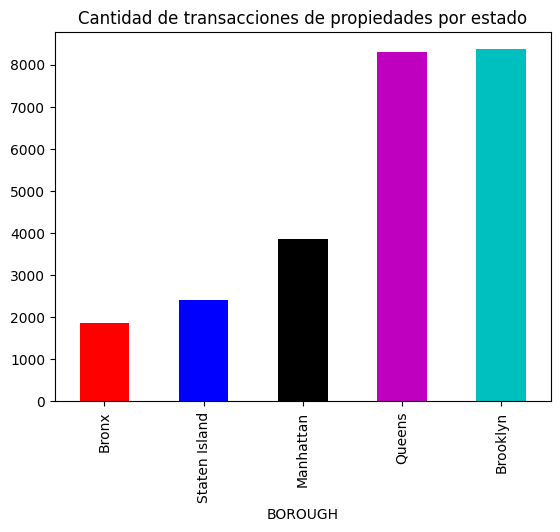

In [15]:
df_sales[df_sales['SALE PRICE'] == 0]['BOROUGH'].value_counts().sort_values().plot.bar(color=['r', 'b', 'k', 'm', 'c'])
plt.title("Cantidad de transacciones de propiedades por estado");
# Grafica la cantidad de transacciones con precio de venta por distrito.

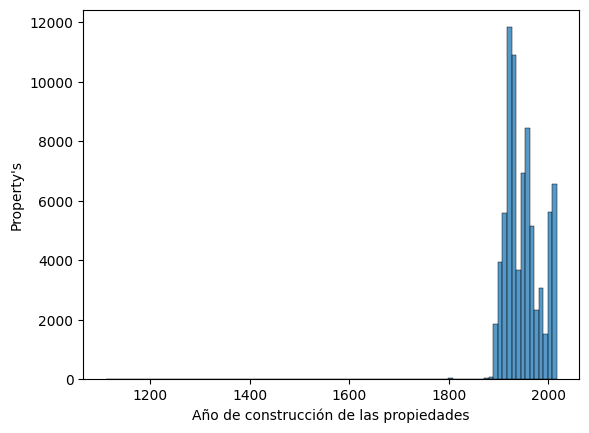

In [16]:
sns.histplot(df_sales[df_sales['YEAR BUILT']!=0]['YEAR BUILT'],bins=100);
plt.ylabel("Property's")
plt.xlabel("Año de construcción de las propiedades");
# Crea un histograma del año de construcción de las propiedades.

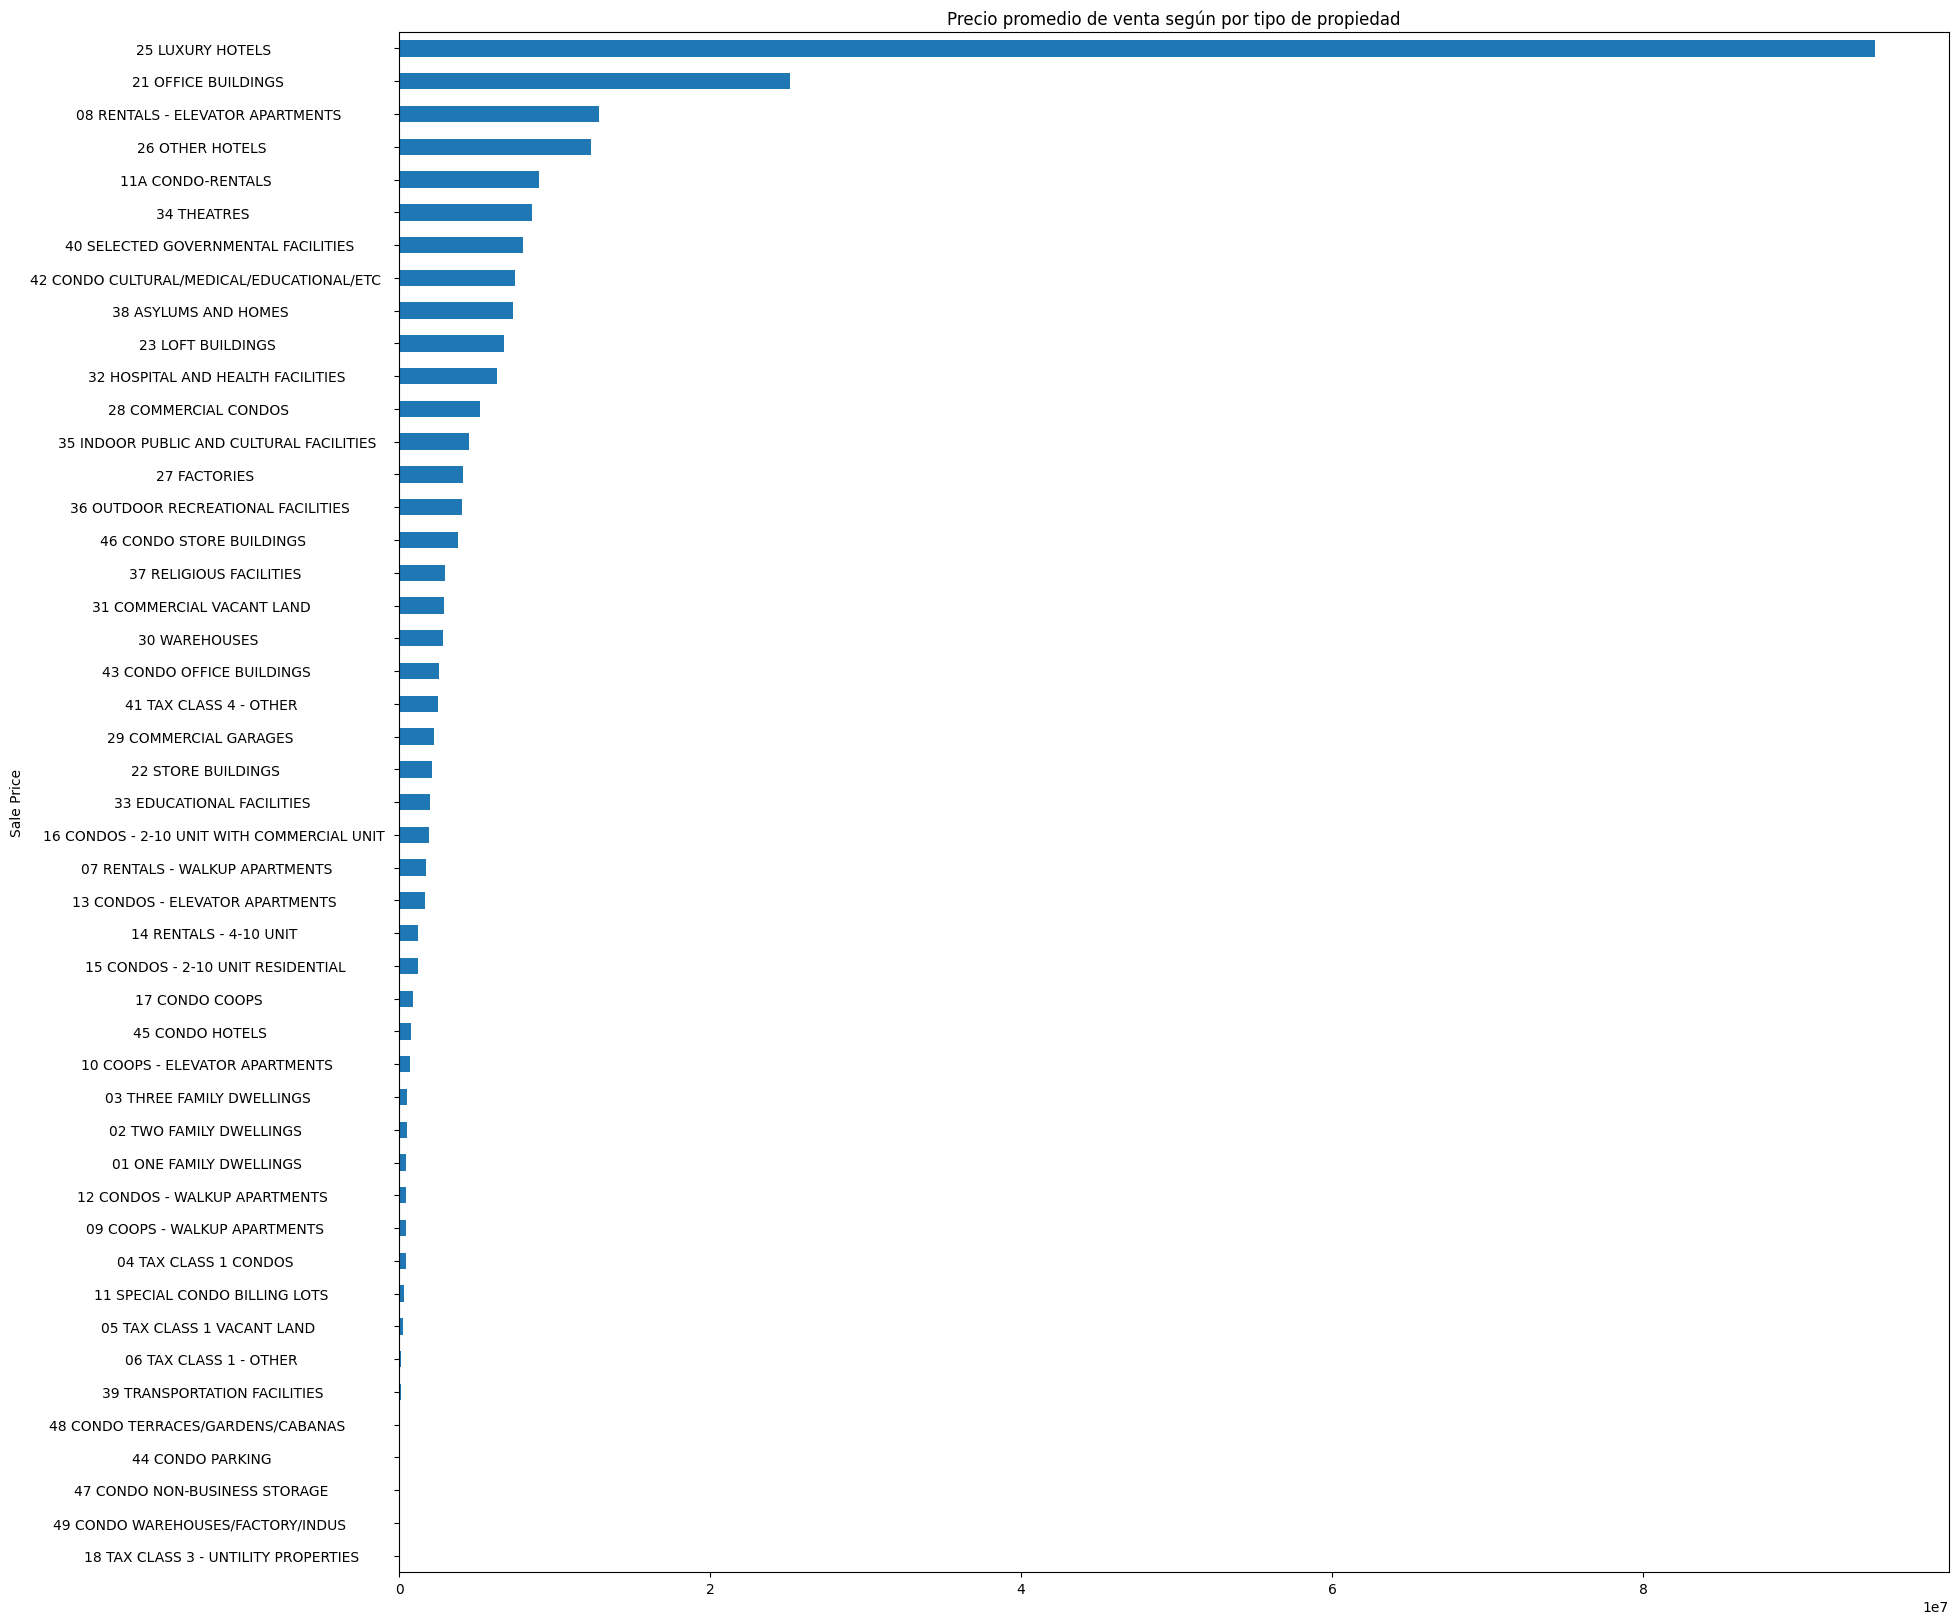

In [17]:
plt.figure(figsize=(20,20))
# Configura una figura de tamaño 20x20 para la visualización del gráfico.

df_sales['SALE PRICE'].groupby(df_sales['BUILDING CLASS CATEGORY']).mean().sort_values().plot.barh()
plt.ylabel("Sale Price")

plt.title('Precio promedio de venta según por tipo de propiedad');
# Grafica el precio promedio de venta según la categoría de clase del edificio.

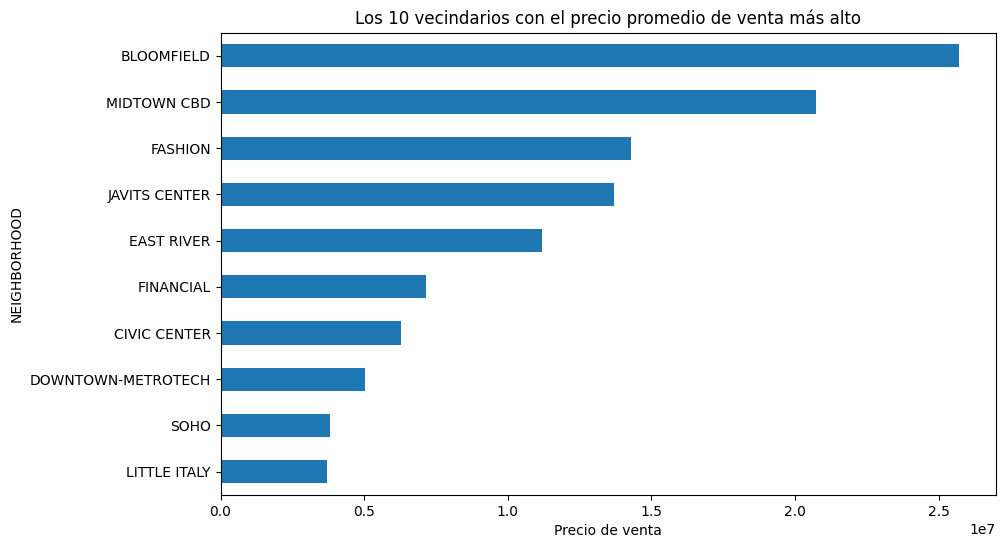

In [18]:
plt.figure(figsize=(10,6))
df_sales['SALE PRICE'].groupby(df_sales['NEIGHBORHOOD']).mean().sort_values()[244:254].plot.barh()
plt.title('Los 10 vecindarios con el precio promedio de venta más alto')
plt.xlabel("Precio de venta");
# Grafica los 10 vecindarios con el precio promedio de venta más alto.

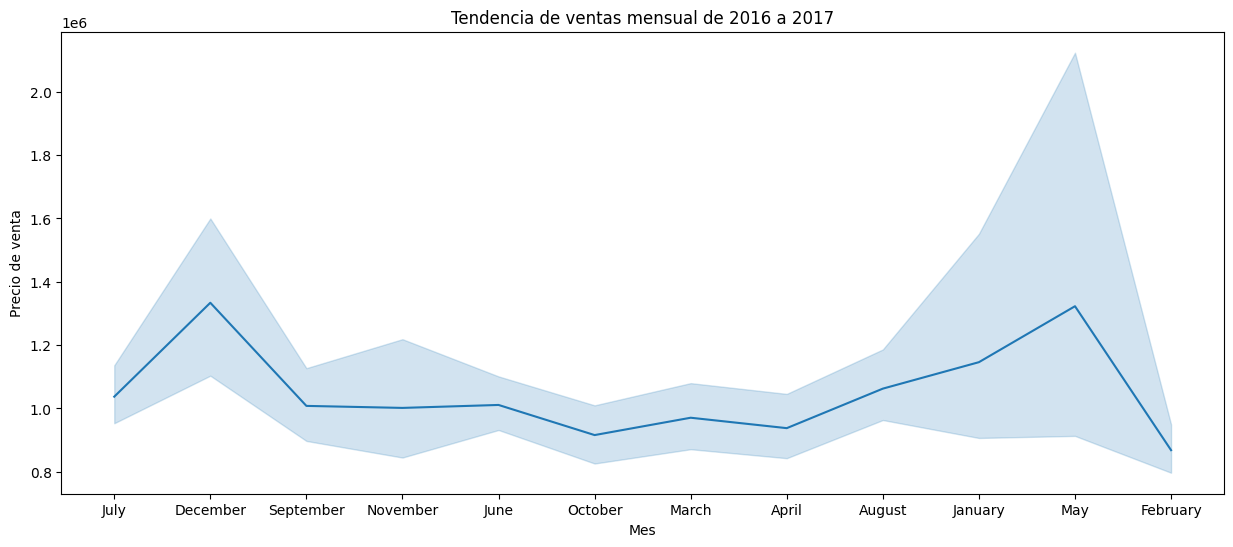

In [19]:
plt.figure(figsize=(15,6))

sns.lineplot(x='sale_month',y='SALE PRICE',data=df_sales)
plt.title('Tendencia de ventas mensual de 2016 a 2017')
plt.ylabel('Precio de venta')
plt.xlabel('Mes')
plt.show();
# Crea una gráfica de líneas para la tendencia de ventas mensual de 2016 a 2017.

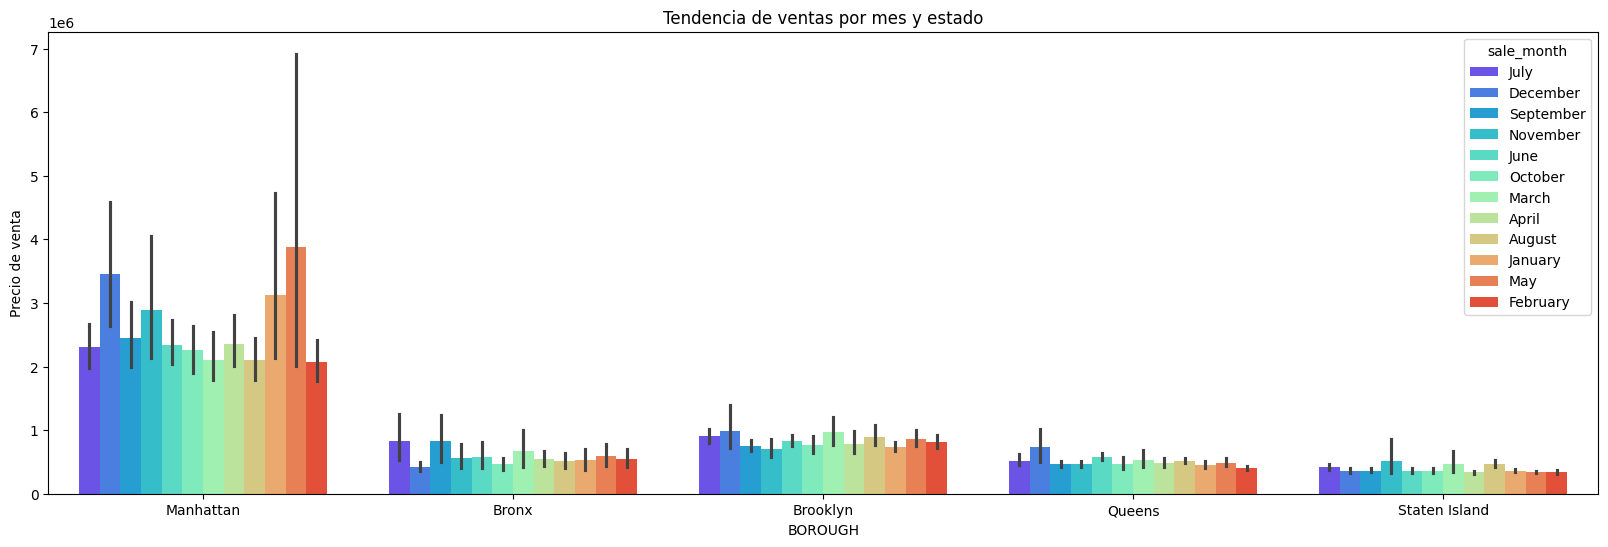

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x='BOROUGH', y='SALE PRICE', hue='sale_month', data=df_sales, palette='rainbow');
plt.title('Tendencia de ventas por mes y estado')
plt.ylabel('Precio de venta')
plt.show()
# Grafica la tendencia de ventas por mes y distrito.

C:\Users\isabe\AppData\Local\Temp\ipykernel_24828\4169885722.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="BOROUGH", y="RESIDENTIAL UNITS", data=df_sales, estimator=sum, ci=None)
C:\Users\isabe\AppData\Local\Temp\ipykernel_24828\4169885722.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="BOROUGH", y="COMMERCIAL UNITS", data=df_sales, estimator=sum, ci=None)


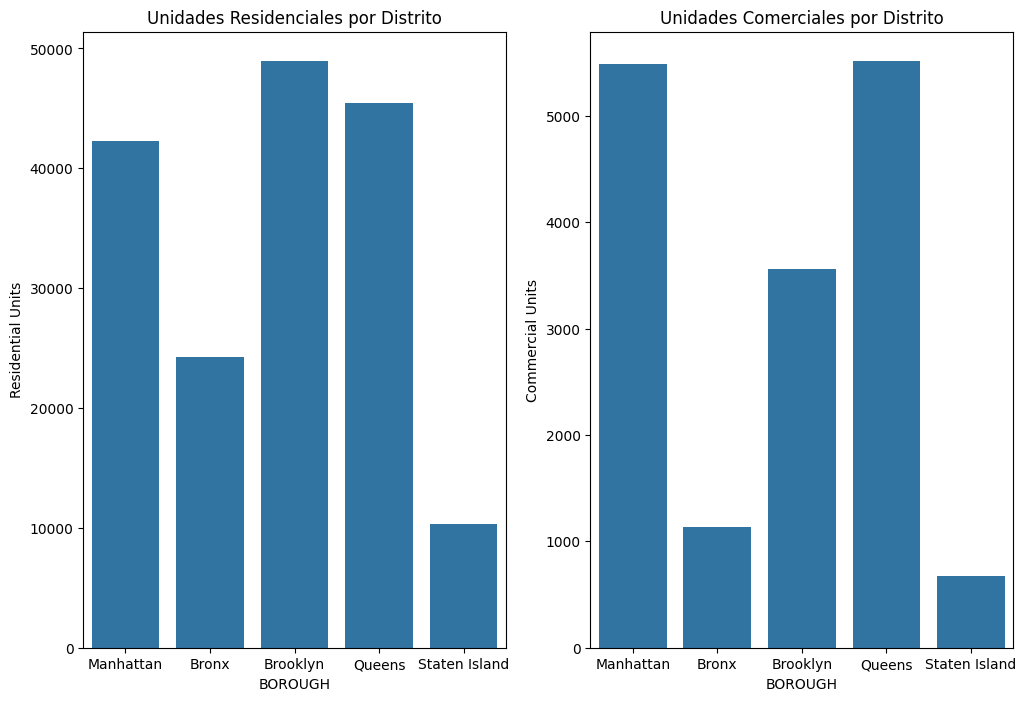

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)

sns.barplot(x="BOROUGH", y="RESIDENTIAL UNITS", data=df_sales, estimator=sum, ci=None)
plt.ylabel('Residential Units')
plt.title('Unidades Residenciales por Distrito')

plt.subplot(1, 2, 2)

sns.barplot(x="BOROUGH", y="COMMERCIAL UNITS", data=df_sales, estimator=sum, ci=None)
plt.ylabel('Commercial Units')
plt.title('Unidades Comerciales por Distrito');
# Crea gráficos de barras para unidades residenciales y comerciales por distrito.

C:\Users\isabe\AppData\Local\Temp\ipykernel_24828\289181383.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="BOROUGH", y="SALE PRICE", hue='sale_year', data=df_sales, palette='rainbow', ci=None)


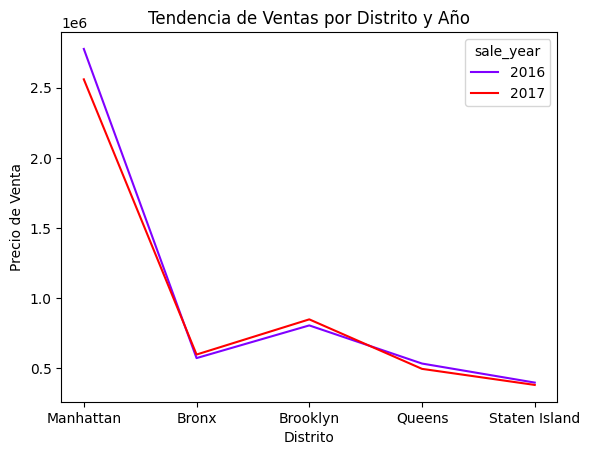

In [22]:
sns.lineplot(x="BOROUGH", y="SALE PRICE", hue='sale_year', data=df_sales, palette='rainbow', ci=None)

# Título y etiquetas
plt.title('Tendencia de Ventas por Distrito y Año')
plt.xlabel('Distrito')
plt.ylabel('Precio de Venta')

# Mostrar la figura
plt.show()

# Crea una gráfica de líneas para la tendencia de ventas por distrito y año.

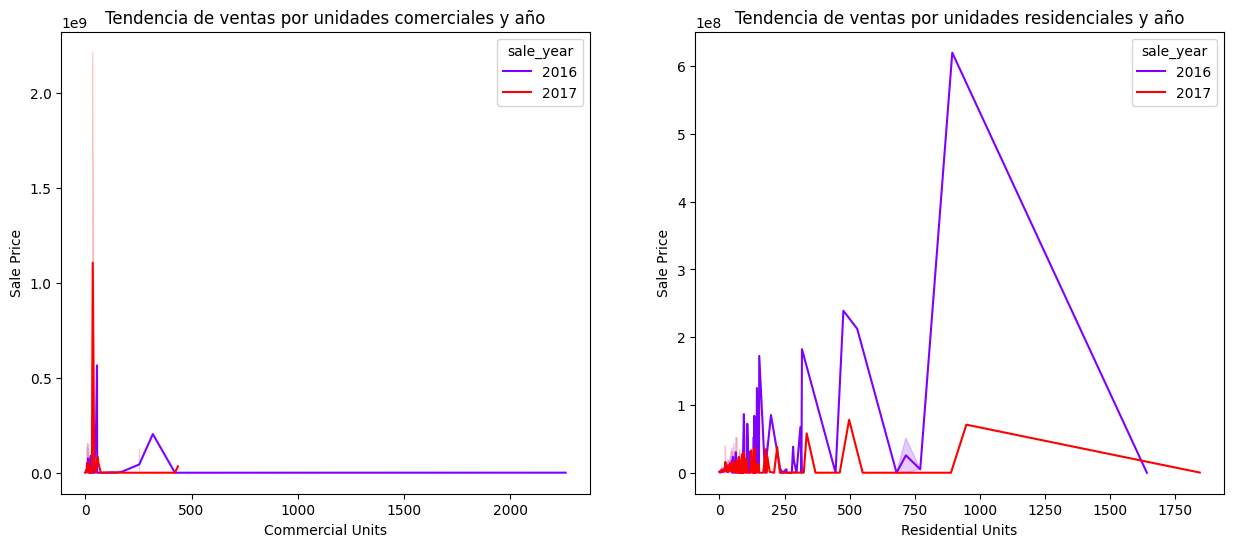

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Tendencia de ventas por unidades comerciales y año')
sns.lineplot(x="COMMERCIAL UNITS",y="SALE PRICE",hue='sale_year',data=df_sales, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Commercial Units')

plt.subplot(1, 2, 2)
plt.title('Tendencia de ventas por unidades residenciales y año')
sns.lineplot(x="RESIDENTIAL UNITS",y="SALE PRICE",hue='sale_year',data=df_sales, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Residential Units');

# Crea gráficos de líneas para la tendencia de ventas por unidades comerciales y residenciales y año.

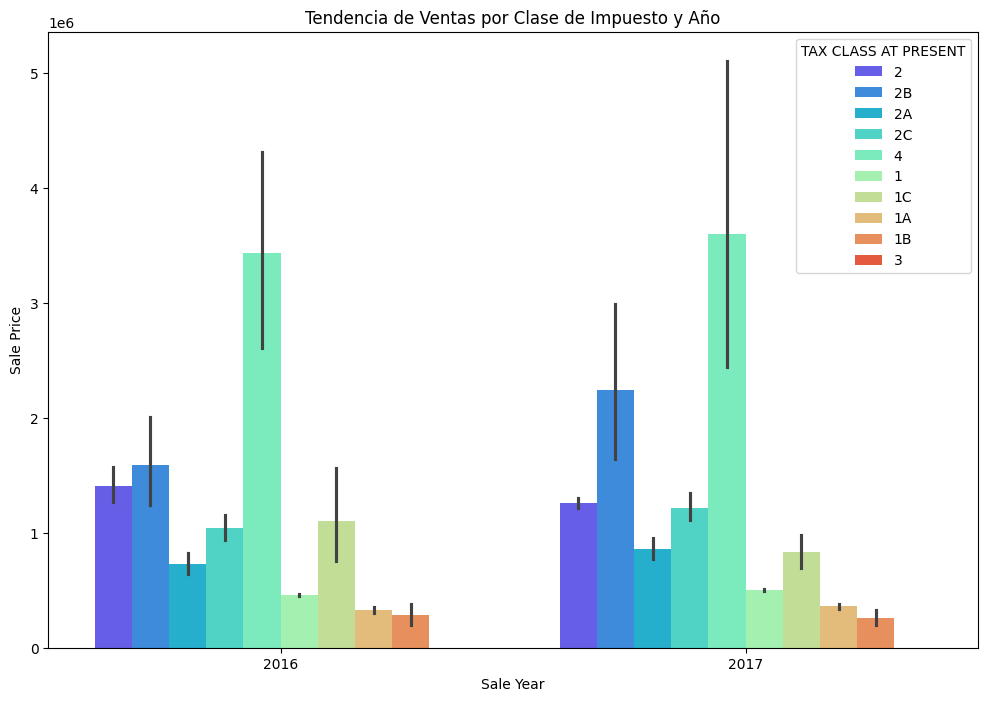

In [24]:
plt.figure(figsize=(12,8))
plt.title('Tendencia de Ventas por Clase de Impuesto y Año')

sns.barplot(x="sale_year",y="SALE PRICE",hue='TAX CLASS AT PRESENT',data=df_sales[df_sales['TAX CLASS AT PRESENT']!= ' '], palette='rainbow');
plt.xlabel('Sale Year')
plt.ylabel('Sale Price');

# Crea un gráfico de barras para la tendencia de ventas por clase de impuesto y año.

C:\Users\isabe\AppData\Local\Temp\ipykernel_24828\3653530975.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sale_year', y='SALE PRICE', hue='BOROUGH', data=df_sales, palette='rainbow', ci=None)


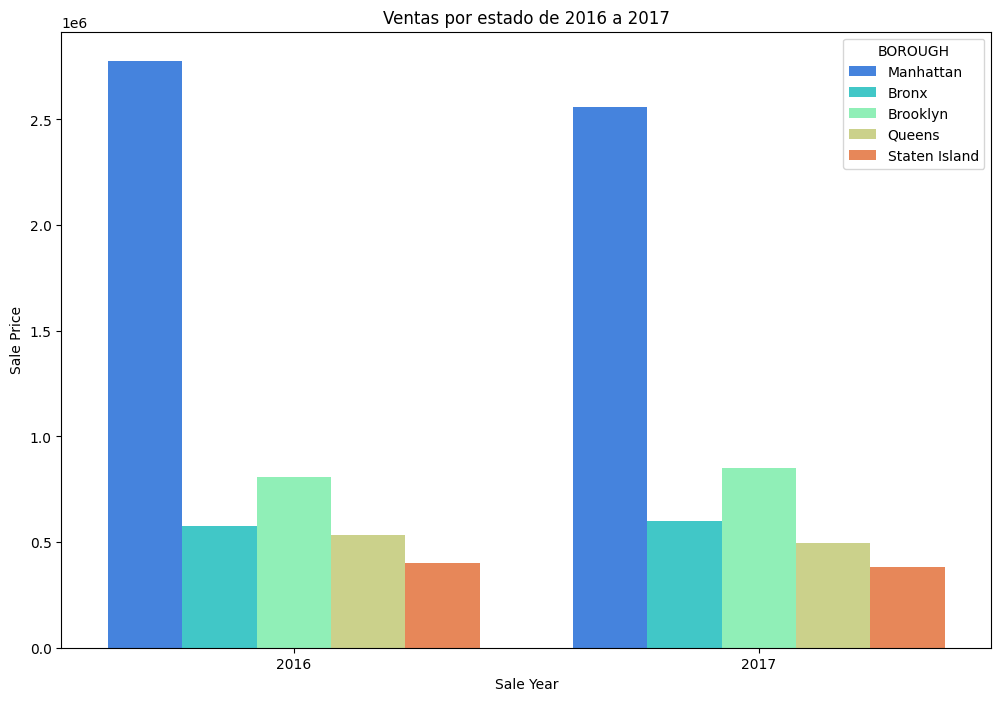

In [25]:
plt.subplots(figsize=(12,8))
sns.barplot(x='sale_year', y='SALE PRICE', hue='BOROUGH', data=df_sales, palette='rainbow', ci=None)
plt.title('Ventas por estado de 2016 a 2017')
plt.ylabel('Sale Price')
plt.xlabel('Sale Year');

# Crea un gráfico de barras para las ventas por distrito de 2016 a 2017

# CONCLUSIONES

### Aumento de Precios a lo Largo del Tiempo

Uno de los hallazgos más destacados es que los precios de las propiedades han mostrado una tendencia al alza en los últimos años. Esto sugiere que, a pesar de las fluctuaciones económicas y otros desafíos, el mercado inmobiliario de Nueva York sigue siendo atractivo para los compradores. Este aumento puede ser un indicativo de la demanda constante por vivir en esta vibrante ciudad.

### Disparidades según Vecindarios

Al analizar los datos, se notó que hay una gran diferencia en los precios de las propiedades dependiendo del vecindario. Por ejemplo, Manhattan tiene precios significativamente más altos que zonas como Brooklyn o Queens. Esto no solo refleja el prestigio y la demanda en ciertas áreas, sino también cómo la ubicación puede influir en el estilo de vida y las oportunidades disponibles para los residentes.

## Preferencias por Tipos de Propiedades

El análisis reveló que los condominios y cooperativas son los tipos de propiedades más vendidos en comparación con las casas unifamiliares. Esto puede deberse a que muchas personas buscan opciones más accesibles y prácticas en una ciudad tan densa. Además, la vida en condominios a menudo ofrece comodidades adicionales que atraen a los compradores.

## Impacto de la Pandemia

Un hallazgo notable fue la caída en las ventas durante el año 2020, coincidiendo con el inicio de la pandemia de COVID-19. Esto resalta cómo eventos globales pueden afectar drásticamente el mercado inmobiliario. Muchos potenciales compradores optaron por esperar antes de hacer una compra significativa, lo que generó un parón temporal en el sector.

## Relación entre Tamaño y Precio

Se observó una clara relación entre el tamaño de las propiedades y su precio de venta; es decir, a mayor tamaño (en pies cuadrados), mayor es el precio. Esto sugiere que los compradores valoran el espacio adicional y están dispuestos a pagar más por propiedades más grandes, lo cual es un factor importante a considerar tanto para vendedores como para compradores.
